# Total cases/deaths of COVID-19 and case/death rate anlyzes in state level (admin1) 

This Notebook studys the cases and deaths due COVID-19 in Mexico.

It shows how the cases and deaths appear since the beggining of the pandemic through the data provide by  [CONACYT](https://datos.covid-19.conacyt.mx/#DownZCSV).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
pd.options.display.max_rows = None  # display all rows
pd.options.display.max_columns = None  # display all columsns

## Covid cases analyzes

Read registered cases for Mexican states from csv file

In [3]:
dfCases = pd.read_csv('../data/Casos_Diarios_Estado_Nacional_Confirmados_20210620.csv')

Determinating the size of the cases dataframe

In [4]:
numStates,locLastDateCases=dfCases.shape

Remove the national numbers from the dataframes

In [5]:
dfCases = dfCases.query("nombre != 'Nacional'").copy()

Compute the total cases per state since the first day registered to the last day

In [6]:
dfCases['total_cases'] = dfCases.iloc[:,3:locLastDateCases].sum(axis=1)

Compute the case rate per state for each 100000 persons 

In [7]:
dfCases['case_rate'] = (dfCases['total_cases']/dfCases['poblacion'])*100000

Compute the total cases per state since the 60 days before the last day registered

In [8]:
dfCases['total_cases_last_60_days'] = dfCases.iloc[:,locLastDateCases-59:locLastDateCases].sum(axis=1)

Compute the case rate per state for each 100000 persons in the last 60 days

In [9]:
dfCases['case_rate_last_60_days'] =(dfCases['total_cases_last_60_days']/ dfCases['poblacion'])*100000 #using as reference the last day

Rename columns for easier interpretation

In [10]:
dfCases.rename(columns = {'nombre': 'state', 'poblacion': 'population'}, inplace=True)

## Covid deaths analyzes

Read registered cases for Mexican states from csv file

In [11]:
dfDeaths = pd.read_csv('../data/Casos_Diarios_Estado_Nacional_Defunciones_20210620.csv')

Determinating the size of the deaths dataframe

In [12]:
numStates,locLastDateDeaths=dfDeaths.shape

Remove the national numbers from the dataframes

In [13]:
dfDeaths = dfDeaths.query("nombre != 'Nacional'").copy()

Compute the total deaths per state since the first day registered to the last day

In [14]:
dfDeaths['total_deaths'] = dfDeaths.iloc[:,3:locLastDateDeaths].sum(axis=1)

Compute the death rate per state for each 100000 persons

In [15]:
dfDeaths['death_rate'] = (dfDeaths['total_deaths']/dfDeaths['poblacion'])*100000 #total/population*100,000

Compute the total deaths per state since the 60 days before the last day registered

In [16]:
dfDeaths['total_deaths_last_60_days'] = dfDeaths.iloc[:,locLastDateDeaths-59:locLastDateDeaths].sum(axis=1)

Compute the death rate per state for each 100000 persons in the last 60 days

In [17]:
dfDeaths['death_rate_last_60_days'] = (dfDeaths['total_deaths_last_60_days']/dfDeaths['poblacion'])*100000

Rename columns for easier interpretation

In [18]:
dfDeaths.rename(columns = {'nombre': 'state', 'poblacion': 'population'}, inplace=True)

### Plot of top 10 states with the most largest populations

Utilizing any of the previous dataframes we can see the top 10 states with the most largest populations

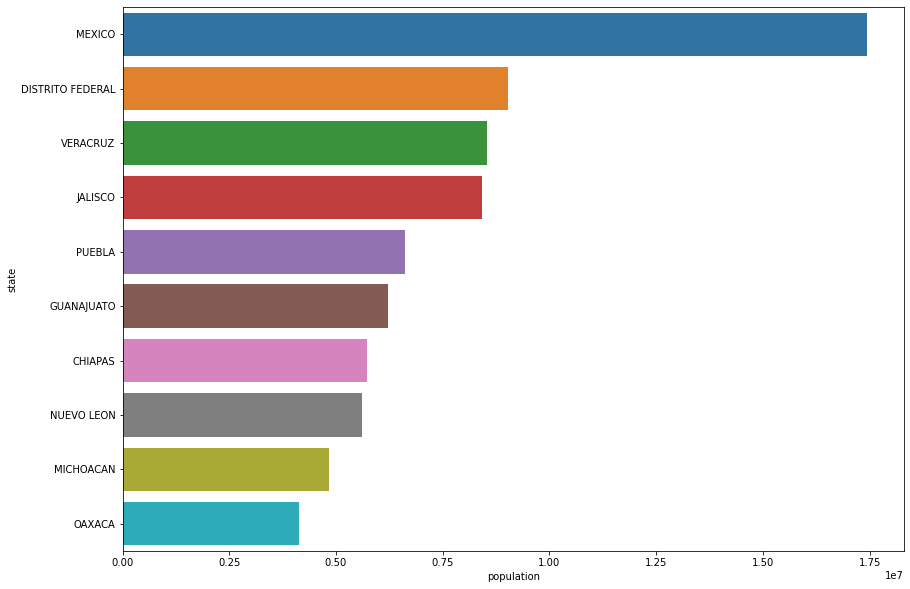

In [19]:
plt.figure(figsize=(14,10))
top10largestPopulations = sns.barplot(x="population", y="state", data=dfCases.nlargest(10, 'population').copy())
top10largestPopulations = top10largestPopulations.get_figure()
sns.set_context('paper', font_scale=2)
top10largestPopulations.savefig("../figures/top10largestPopulated_states.png", bbox_inches="tight")

Mostly all the top populated states are the ones that have the biggest cities in the whole country.

### Plot of total cases for each state 

By sorting the dataframe in ascending order of the state with highest cases, the next barplot is obtain

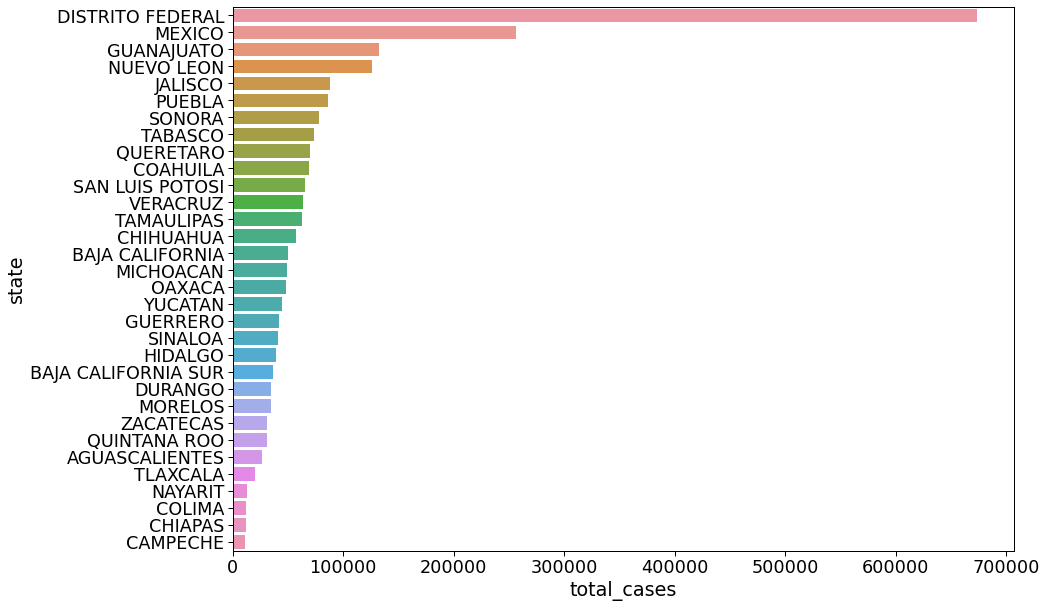

In [20]:
dfCasesSorted = dfCases
dfCasesSorted.sort_values('total_cases',inplace=True, ascending=False)
plt.figure(figsize=(14,10))
totalCases = sns.barplot(x="total_cases", y="state", data=dfCasesSorted)
totalCases = totalCases.get_figure()
sns.set_context('paper', font_scale=1)
totalCases.savefig("../figures/total_cases_states.png", bbox_inches="tight")

The top states with more cases are the ones with the biggest cities in the whole country.

### Plot of top 10 states with the highest case rate

With the cases dataframe we can obtain the top 10 states with the highest cases rate as following

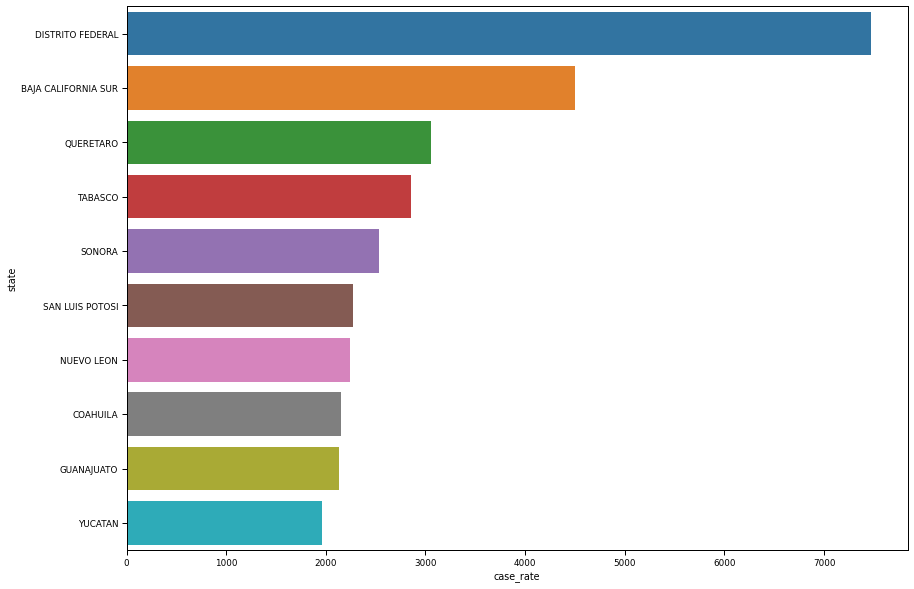

In [21]:
dfCasesSorted.sort_values('case_rate',inplace=True, ascending=False)
plt.figure(figsize=(14,10))
casesRate = sns.barplot(x="case_rate", y="state", data=dfCasesSorted.nlargest(10, 'case_rate').copy())
casesRate = casesRate.get_figure()
sns.set_context('paper', font_scale=2) 
casesRate.savefig("../figures/top10_case_rate_states.png", bbox_inches="tight")

The highest cases rate not only are concentrated on the states with the biggest cities of the country but also in the states with the most attractive tourist places in the country.

### Plot of total deaths for each state 

By sorting the dataframe in ascending order of the state with highest deaths, the next barplot is obtain

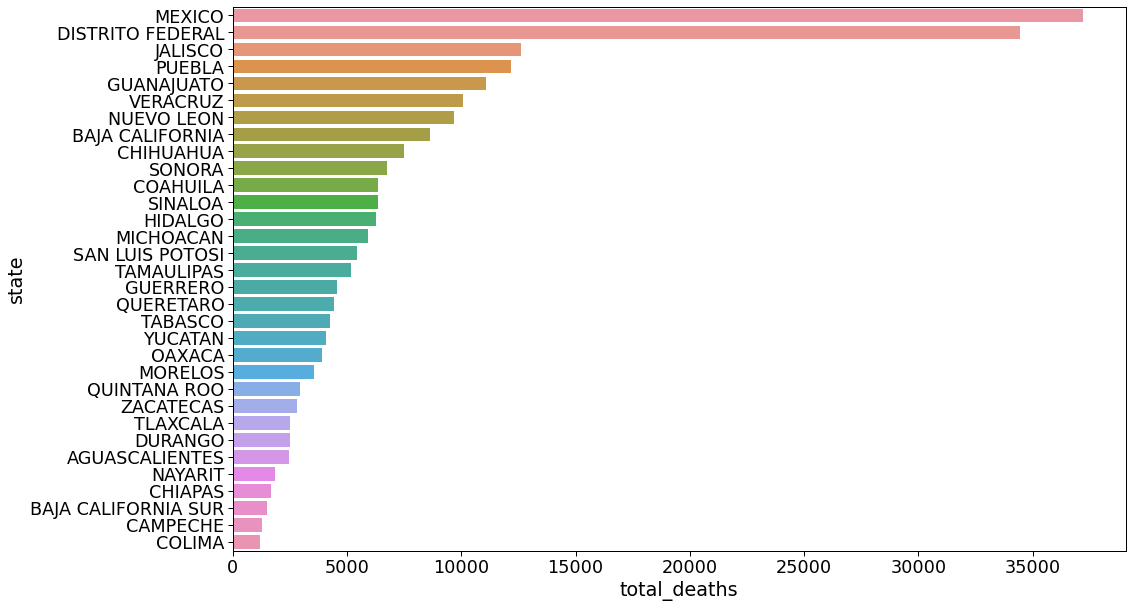

In [22]:
dfDeathsSorted = dfDeaths
dfDeathsSorted.sort_values('total_deaths',inplace=True, ascending=False)
plt.figure(figsize=(16,10))
totalDeaths = sns.barplot(x="total_deaths", y="state", data=dfDeathsSorted)
totalDeaths = totalDeaths.get_figure()
sns.set_context('paper', font_scale=1) 
totalDeaths.savefig("../figures/total_deaths_states.png", bbox_inches="tight")

The top states with more deaths are the ones with the biggest cities in the whole country due that thoses cities also have a high quantity of total cases.

### Plot of top 10 states with the highest death rate

With the deaths dataframe we can obtain the top 10 states with the highest deaths rate as following

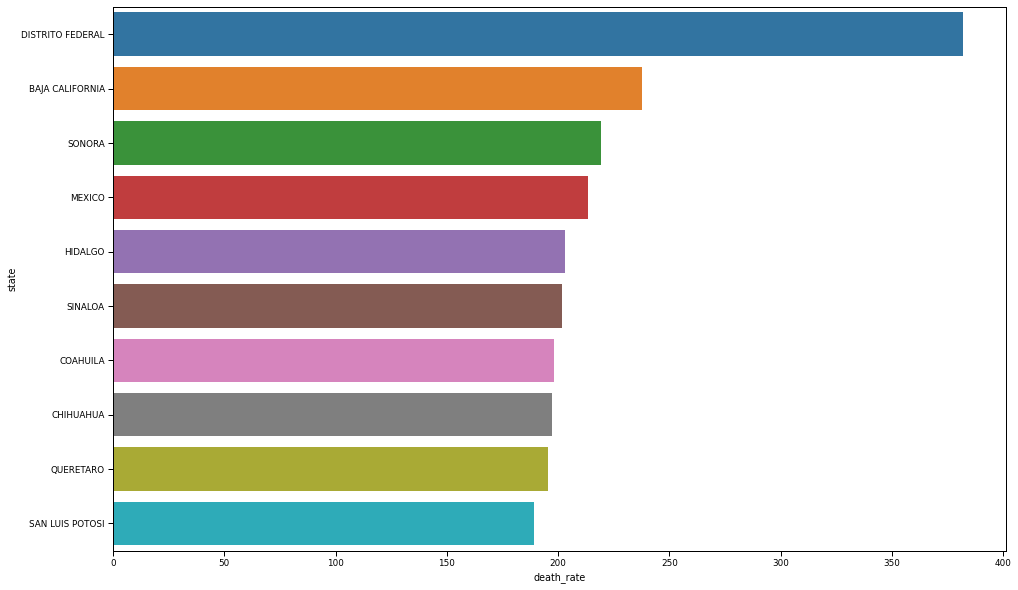

In [23]:
dfDeathsSorted.sort_values('death_rate',inplace=True, ascending=False)
plt.figure(figsize=(16,10))
deathsRate = sns.barplot(x="death_rate", y="state", data=dfDeathsSorted.nlargest(10, 'death_rate').copy())
deathsRate = deathsRate.get_figure()
sns.set_context('paper', font_scale=2)
deathsRate.savefig("../figures/top10largest_death_rate_states.png", bbox_inches="tight")

The highest death rate are mostly concentrated on the states with the biggest cities of the country this could be due the health status of the population and its medical services.

### Plot of top 10 states with the lowest case rate

With the cases dataframe we can obtain the top 10 states with the lowest cases rate as following

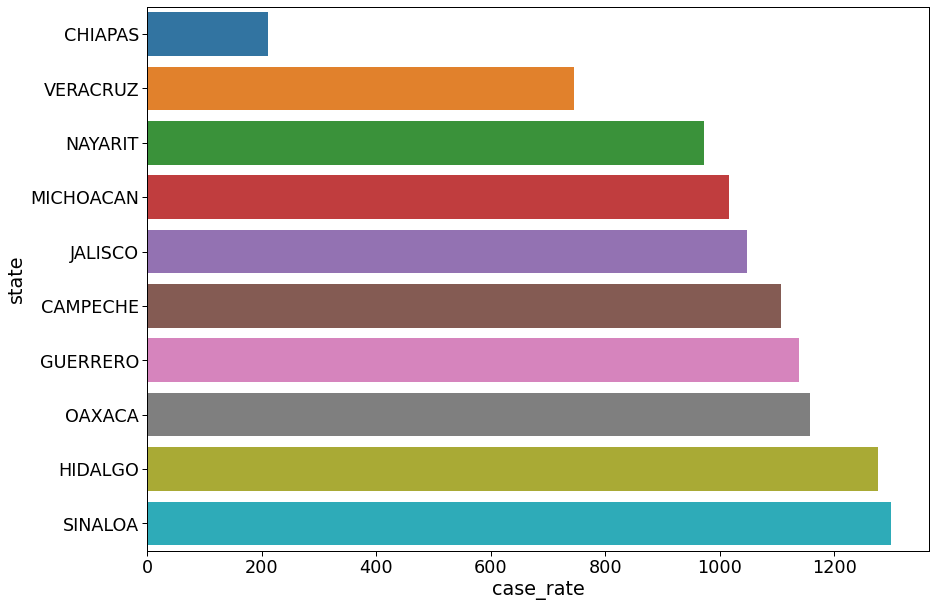

In [24]:
plt.figure(figsize=(14,10))
top10smallestCasesRate = sns.barplot(x="case_rate", y="state", data=dfCases.nsmallest(10, 'case_rate').copy())
top10smallestCasesRate = top10smallestCasesRate.get_figure()
sns.set_context('paper', font_scale=2)
top10smallestCasesRate.savefig("../figures/top10smallest_case_rate_states.png", bbox_inches="tight")

The states with the lowest case rate are those that are composed mostly of rural areas.

### Plot of top 10 states with the lowest death rate

With the deaths dataframe we can obtain the top 10 states with the lowest death rate as following

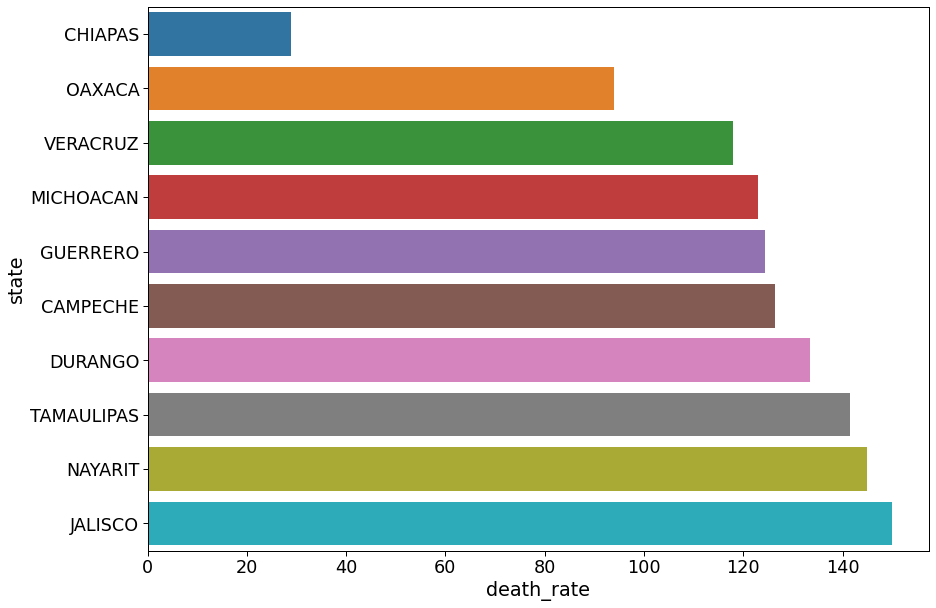

In [25]:
plt.figure(figsize=(14,10))
top10smallestDeathsRate = sns.barplot(x="death_rate", y="state", data=dfDeaths.nsmallest(10, 'death_rate').copy())
top10smallestDeathsRate = top10smallestDeathsRate.get_figure()
sns.set_context('paper', font_scale=1)
top10smallestDeathsRate.savefig("../figures/top10smallest_death_rate_states.png", bbox_inches="tight")

Since the states with the lowest case rate are those that are composed mostly of rural areas the same goes for those with the lowest death rate.

### Plot of top 10 states with the highset case rate in the last 60 days

With the cases dataframe we can obtain the top 10 states with the highest case rate the last 60 days as following

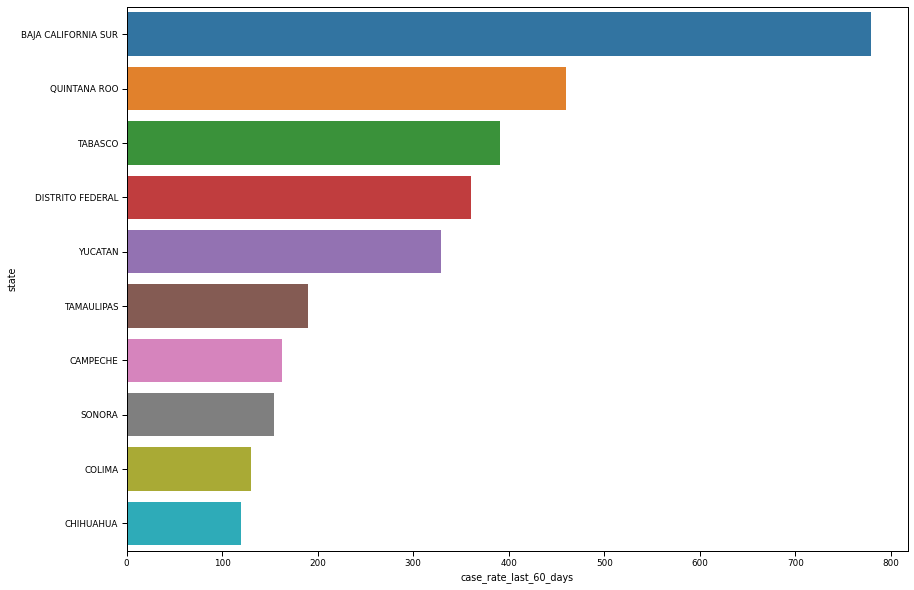

In [26]:
plt.figure(figsize=(14,10))
top10casesRate60 = sns.barplot(x="case_rate_last_60_days", y="state", data=dfCases.nlargest(10,'case_rate_last_60_days').copy())
sns.set_context('paper', font_scale=1)
top10casesRate60 = top10casesRate60.get_figure()
top10casesRate60.savefig("../figures/top10smallest_case_rate_last_60_days_states.png", bbox_inches="tight")

In the last 60 days, the states with the highest rate of cases are in this state it is assume that is due to tourism and border traffic that has emerged lately because people feel safer because the general population is getting vaccinated.

### Plot of top 10 states with the highset death rate in the last 60 days

With the deaths dataframe we can obtain the top 10 states with the highest deaths rate the last 60 days as following

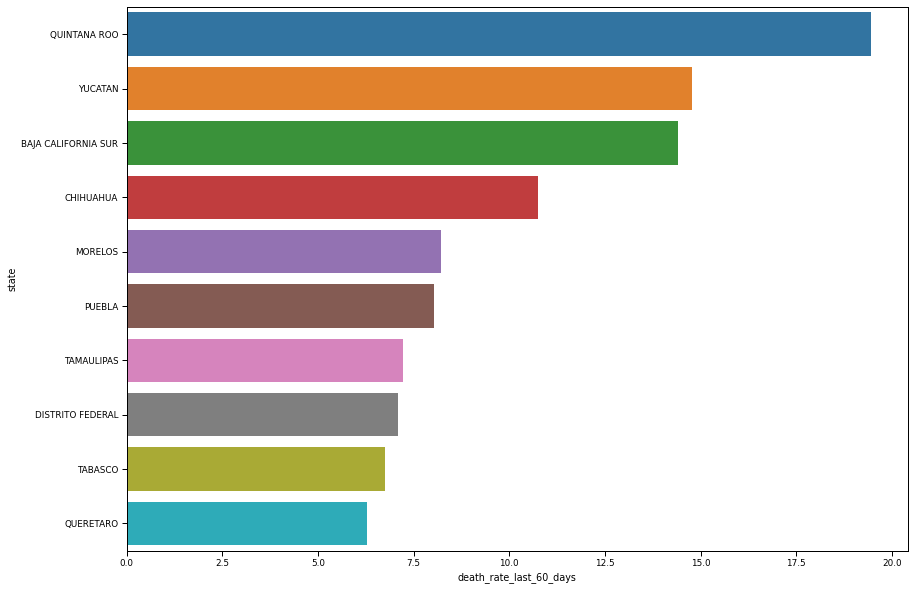

In [27]:
plt.figure(figsize=(14,10))
top10deathsRate60 = sns.barplot(x="death_rate_last_60_days", y="state", data=dfDeaths.nlargest(10,'death_rate_last_60_days').copy())
top10deathsRate60 = top10casesRate60.get_figure()        
sns.set_context('paper', font_scale=1)
top10deathsRate60 = top10deathsRate60.savefig("../figures/top10smallest_death_rate_last_60_days_states.png", bbox_inches="tight")

In the last 60 days, the states with the highest rate of cases are in this state due to tourism and border traffic that has emerged lately because people feel safer because the general population is getting vaccinated.

To see the correlation of deaths-cases the merged of both of the dataframes is perfomed.

In [28]:
dfAll = pd.merge(dfCases,dfDeaths,on='cve_ent')

### Correlation plot between the total deaths and cases

The correlation between the total deaths and cases is the following

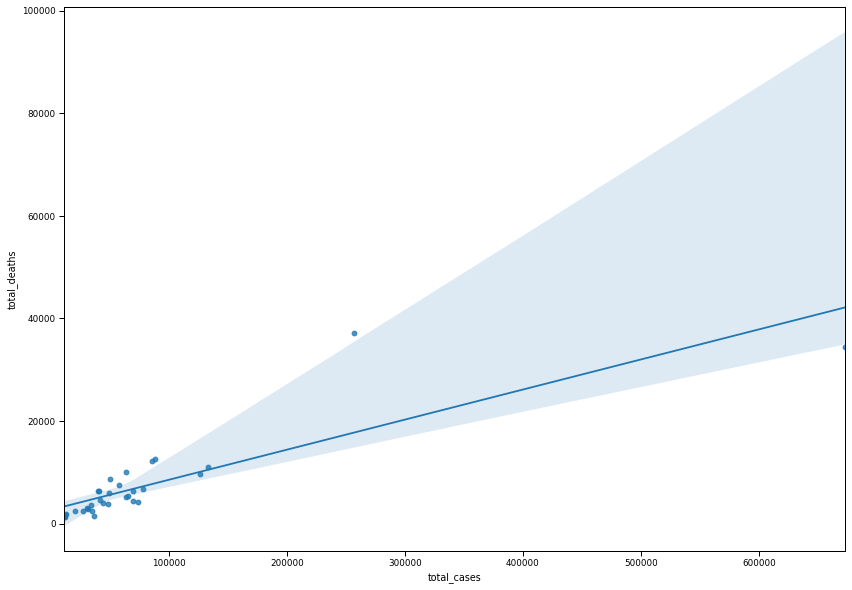

In [29]:
plt.figure(figsize=(14,10))
totalCasesDeaths = sns.regplot(x="total_cases", y="total_deaths", data=dfAll)
totalCasesDeaths = totalCasesDeaths.get_figure()
sns.set_context('paper', font_scale=2)
totalCasesDeaths.savefig("../figures/totalDeaths-totalDeaths_states.png", bbox_inches="tight")

We can see that the behaviour of his correlation is positive due the fact that if there's cases there will be deaths.

### Correlation plot between the death rate and case rate

The correlation between the deaths and cases rate is the following

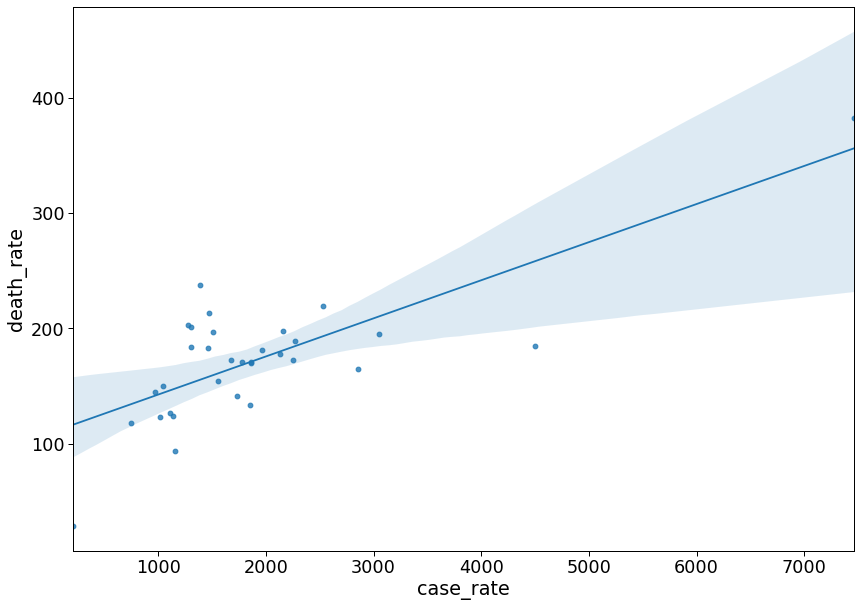

In [30]:
plt.figure(figsize=(14,10))
casesDeathsRate = sns.regplot(x="case_rate", y="death_rate", data=dfAll)
casesDeathsRate = casesDeathsRate.get_figure()
sns.set_context('paper', font_scale=2)
casesDeathsRate.savefig("../figures/deathsRate-casesRate_states.png", bbox_inches="tight")

We can see that the behaviour of his correlation is positive due the fact that if the case rate increases also the death rate will.

### Correlation plot between the death rate and case rate in the last 60 days

The correlation between the deaths and cases rate in the last 60 days is the following

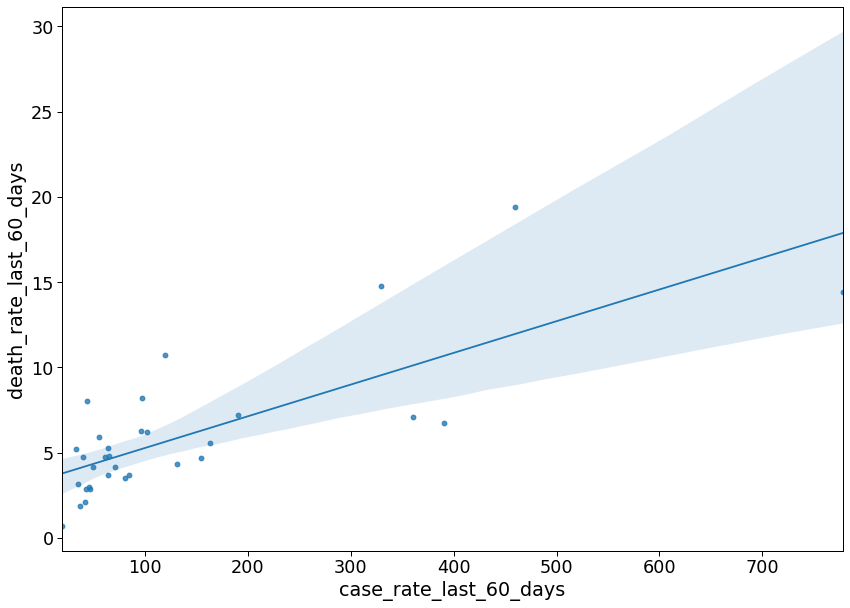

In [31]:
plt.figure(figsize=(14,10))
deathsCasesRate60 = sns.regplot(x="case_rate_last_60_days", y="death_rate_last_60_days", data=dfAll)
deathsCasesRate60  = deathsCasesRate60 .get_figure()
sns.set_context('paper', font_scale=2)
deathsCasesRate60.savefig("../figures/deathsRate60-casesRate60_states.png", bbox_inches="tight")

The behaviour of his correlation is positive as the accumulative case rate - death rate correlation due the fact that if the case rate increases also the death rate will even in the last 60 days.

The most important data of this week analyzes is seperated and preparated to store.

In [32]:
dfFinal = dfAll[['cve_ent','state_x','population_x',
                 'total_cases','case_rate','total_cases_last_60_days','case_rate_last_60_days',
                 'total_deaths','death_rate','total_deaths_last_60_days','death_rate_last_60_days']].copy()

The data to store is cleaned and sorted for a future easier interpretation.

In [33]:
dfFinal.rename(columns = {'state_x': 'state', 'population_x': 'population'}, inplace=True)
dfFinal.sort_values(by=['state'], ascending = True, inplace=True)
dfFinal

,cve_ent,state,population,total_cases,case_rate,total_cases_last_60_days,case_rate_last_60_days,total_deaths,death_rate,total_deaths_last_60_days,death_rate_last_60_days
10,1,AGUASCALIENTES,1434635,26694,1860.682334,793,55.275384,2456,171.193370,85,5.924852
20,2,BAJA CALIFORNIA,3634868,50278,1383.213916,2349,64.624080,8648,237.917856,174,4.786969
1,3,BAJA CALIFORNIA SUR,804708,36223,4501.384353,6266,778.667542,1486,184.663257,116,14.415167
26,4,CAMPECHE,1000617,11081,1107.416724,1628,162.699614,1265,126.421998,56,5.596547
31,7,CHIAPAS,5730367,12050,210.283216,1095,19.108724,1654,28.863771,41,0.715486
17,8,CHIHUAHUA,3801487,57483,1512.118810,4543,119.505867,7493,197.107079,409,10.758948
7,5,COAHUILA,3218720,69382,2155.577372,1344,41.755729,6376,198.091167,67,2.081573
16,6,COLIMA,785153,12203,1554.219369,1025,130.547804,1210,154.110091,34,4.330366
0,9,DISTRITO FEDERAL,9018645,673343,7466.121574,32484,360.187146,34458,382.075134,640,7.096410
12,10,DURANGO,1868996,34588,1850.619263,1185,63.403025,2495,133.494133,69,3.691822


The data analyzes of this week is stored.

In [34]:
dfFinal.to_csv('../data/week1analyzesStates.csv',index=False)